In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats

In [5]:
data1 = sio.loadmat('ex8data1.mat')
X = data1['X']
Xval = data1['Xval']
yval = data1['yval']

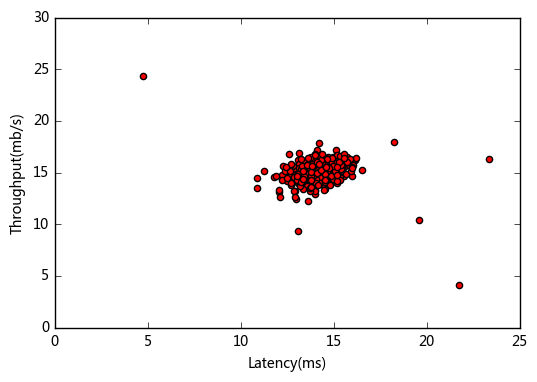

In [17]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c='r')
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')
plt.show()

In [28]:
def estimateGaus(X):
    mu = X.mean(0)
    sigma2 = X.var(0)
    return np.mat(mu), np.mat(sigma2)

In [29]:
mu, sigma2 = estimateGaus(X)

In [ ]:
def visualizeFit(X, mu, sigma2):
    x1, x2=np.meshgrid(0:.5:35)

In [150]:
def prob(X, mu, sigma2):
    p = stats.norm.pdf(X, mu, np.sqrt(sigma2))
    p = p[:, 0]*p[:, 1]
    return p
ptrain = prob(X, mu, sigma2)

In [126]:
def selectprob(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0 
    step = (pval.max()-pval.min())/1000
    for epsilon in np.arange(pval.min(), pval.max(), step):
        pred = (pval < epsilon).reshape(-1,1)
        fp = np.sum((pred==1) & (yval==0))
        fn = np.sum((pred==0) & (yval==1))
        tp = np.sum((pred==1) & (yval==1))
        #print(fp, fn,tp)
        if (tp+fp) ==0:
            prec =0
        else:
            prec = float(tp)/(tp+fp)
        if (tp+fn) ==0:
            rec = 0 
        else:
            rec = float(tp)/(tp+fn)
        if prec + rec == 0:
            F1 == 0
        else:
            F1 = 2*prec*rec/(prec+rec)
            
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
    return bestF1, bestEpsilon
    

In [132]:
pval = prob(Xval, mu, sigma2)
F1, epsilon = selectprob(yval, pval)
print(epsilon, F1)

8.99085277927e-05 0.875


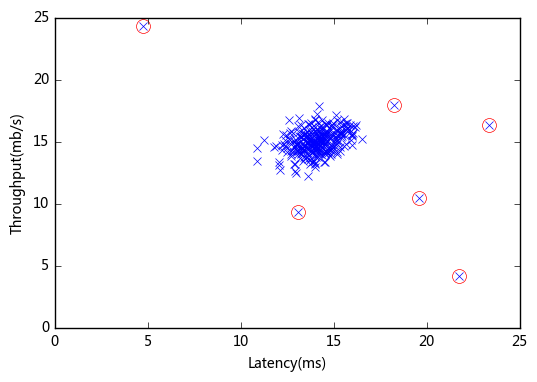

In [151]:
outliters = np.where(ptrain<epsilon)
plt.plot(X[:, 0], X[:, 1], 'bx')#marker='x', c='r')
plt.plot(X[outliters, 0], X[outliters, 1],'ro', fillstyle='none',markersize=10)
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')
plt.show()

In [152]:
#multi
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats

In [154]:
data2 = sio.loadmat('ex8data2.mat')
X = data2['X']
Xval = data2['Xval']
yval = data2['yval']

In [161]:
def get_mean_cov(X):
    m, n = X.shape
    mu = X.mean(0)
    sigma2 = X.var(0)
    sigma2 = np.diag(sigma2)
    det = np.linalg.det(sigma2)
    return mu, sigma2, det

In [162]:
mu, sigma2, det = get_mean_cov(X)

In [197]:
def multiProb(X, mu, sigma2, det):
    m, n = X.shape
    Xnorm = X - mu
    p = np.exp(-0.5*(Xnorm.dot(np.linalg.pinv(sigma2))*Xnorm).sum(1))*\
         ((2*np.pi)**(-n/2.0)*(det**(-0.5)))
    return p

In [194]:
mu.reshape(-1,1)

array([[  4.93940034],
       [ -9.63726819],
       [ 13.81470749],
       [-10.4644888 ],
       [ -7.95622922],
       [ 10.19950372],
       [ -6.01940755],
       [  7.96982896],
       [ -6.2531819 ],
       [  2.32451289],
       [  8.47372252]])

In [205]:
'''
ptrain = np.array([multiProb(x.reshape(-1,1),mu.reshape(-1,1),sigma2,det) for x in X]).reshape(-1,1)
pval = np.array([multiProb(x.reshape(-1,1),mu.reshape(-1,1),sigma2,det) for x in Xval]).reshape(-1,1)
'''
ptrain = multiProb(X, mu.reshape(1,-1),sigma2,det)
pval = multiProb(Xval, mu.reshape(1,-1),sigma2,det)
pval = pval.reshape(-1, 1)

In [206]:
F1, epsilon = selectprob(yval, pval)
print(epsilon, F1)

1.37722889076e-18 0.615384615385


In [207]:
print("Outliers found: %d"%(np.sum(ptrain < epsilon)))

Outliers found: 117
